In [1]:
import argparse
import numpy as np
import os
import struct

import json
from matplotlib import pyplot as plt

def read_array(path):
    with open(path, "rb") as fid:
        width, height, channels = np.genfromtxt(fid, delimiter="&", max_rows=1,
                                                usecols=(0, 1, 2), dtype=int)
        fid.seek(0)
        num_delimiter = 0
        byte = fid.read(1)
        while True:
            if byte == b"&":
                num_delimiter += 1
                if num_delimiter >= 3:
                    break
            byte = fid.read(1)
        array = np.fromfile(fid, np.float32)
    array = array.reshape((width, height, channels), order="F")
    return np.transpose(array, (1, 0, 2)).squeeze()


def write_array(array, path):
    """
    see: src/mvs/mat.h
        void Mat<T>::Write(const std::string& path)
    """
    assert array.dtype == np.float32
    if len(array.shape) == 2:
        height, width = array.shape
        channels = 1
    elif len(array.shape) == 3:
        height, width, channels = array.shape
    else:
        assert False

    with open(path, "w") as fid:
        fid.write(str(width) + "&" + str(height) + "&" + str(channels) + "&")

    with open(path, "ab") as fid:
        if len(array.shape) == 2:
            array_trans = np.transpose(array, (1, 0))
        elif len(array.shape) == 3:
            array_trans = np.transpose(array, (1, 0, 2))
        else:
            assert False
        data_1d = array_trans.reshape(-1, order="F")
        data_list = data_1d.tolist()
        endian_character = "<"
        format_char_sequence = "".join(["f"] * len(data_list))
        byte_data = struct.pack(endian_character + format_char_sequence, *data_list)
        fid.write(byte_data)

In [2]:
root_path = '/home/chow/RoboNGP/data2/DenseCOLMAP/dense/0/stereo'
dmap_path = os.path.join(root_path, 'depth_maps', 'train')
norm_path = os.path.join(root_path, 'norm_maps', 'train')

In [16]:
idx = 100
file_name = f'img_{idx:03d}.png.geometric.bin'
# file_name = f'img_{idx:03d}.png.photometric.bin'
dmap_file_path = os.path.join(dmap_path, file_name)
norm_file_path = os.path.join(norm_path, file_name)

In [17]:
depth_map = read_array(dmap_file_path)
# normal_map = read_array(norm_file_path)

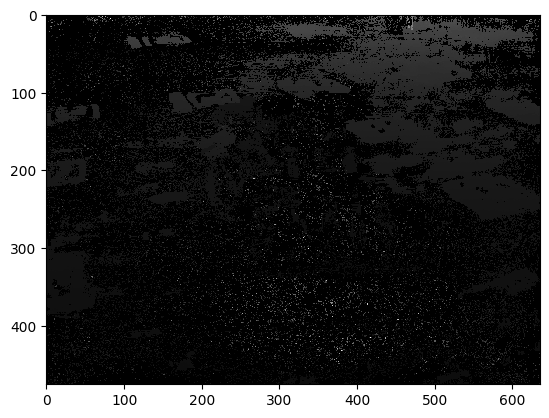

In [18]:
plt.imshow(depth_map, cmap='gray', interpolation='nearest')